##  PARCEIROS 360

###  Pagamento - Utilização Factoring & Bloqueios

- <b>Analista(s)</b>: Victor Hugo
- <b>Projeto</b>: Parceiros 360 - Um modelo de análise de risco para auxiliar no controle das tomadas de decisões através de análises preditivas
- <b>Data</b>: 20/09/2022
- <b>Pilar</b>: Financeiro
- <b>Indicador/KPI</b>: Pagamento - Utilização Factoring & Bloqueios
- <b>Fator de Sensibilidade e Ausência</b>: 18% (Sensibilidade) e 0,27 (Ausência)
- <b>Descrição</b>: Exploração dos dados da base 'T_P360_BASE'.

![title](imgs/kpi_03.png)

In [1]:
!python --version

Python 3.8.12


### BIBLIOTECAS:

In [2]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
from unicodedata import normalize

## vis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## modelo
from sklearn import preprocessing

## alertas
import warnings
warnings.filterwarnings("ignore")

### LAYOUT:

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16,
    'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(rc=rc)
sns.set_style("darkgrid")
sns.set_palette("pastel")

### CONFIGS:

In [4]:
#pd.set_option('max_columns', 200)
pd.options.display.max_columns = 200 

seed = 42
np.random.seed(seed)

### DADOS: 

In [5]:
PATH = "datasets/"

In [6]:
FILE = "20220922 - T_P360_BASE.csv"
pagto = pd.read_csv(PATH + FILE, sep = ';', encoding = 'UTF-8', engine ='python')
pagto.head()

,STATUS,STATUS_WF,SUB_STATUS_WF,Empresa,Fornecedor,Nome_Unico,Mont_em_MI,ANOMES,ANOMES_F,Contrato,Pgto_em,Tp_Pagto,Ambito,Mat_serv,Bloqueio,N_doc,Estado,Qtde_Docs,MESCONTABILIZACAO
0,EM ABERTO,NaN,APROVADO,GLVA,14068018,NaN,"-238718,39",NaN,202208,NaN,NaN,Banco,Fora,NaN,0,80300000,SP,1,N
1,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-167,01",NaN,202112,4.100074e+09,75.0,Banco,Dentro,SERVIÇOS,0,400000057,PR,1,N
2,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-60,61",NaN,202204,NaN,NaN,Banco,Fora,NaN,0,400000016,SP,1,N
3,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-7,79",NaN,202204,NaN,NaN,Banco,Fora,NaN,0,400000017,SP,1,N
4,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-68,4",NaN,202204,NaN,NaN,Banco,Fora,NaN,0,400000018,SP,1,N


In [7]:
pagto.columns = ['STATUS', 'STATUS_WF', 'SUB_STATUS_WF', 'EMPRESA', 'FORNECEDOR', 'NOME_UNICO', 
               'MONT_EM_MI', 'ANOMES', 'ANOMES_F', 'CONTRATO', 'PGTO_EM', 'TP_PAGTO', 'AMBITO', 
               'MAT_SERV', 'BLOQUEIO', 'N_DOC', 'ESTADO', 'QTDE_DOCS', 'MESCONTABILIZACAO']

In [8]:
for i in pagto.columns:
    if pagto[i].dtypes=='object':
        pagto[i] = pagto[i].str.upper()
        
pagto.head(3)

,STATUS,STATUS_WF,SUB_STATUS_WF,EMPRESA,FORNECEDOR,NOME_UNICO,MONT_EM_MI,ANOMES,ANOMES_F,CONTRATO,PGTO_EM,TP_PAGTO,AMBITO,MAT_SERV,BLOQUEIO,N_DOC,ESTADO,QTDE_DOCS,MESCONTABILIZACAO
0,EM ABERTO,NaN,APROVADO,GLVA,14068018,NaN,"-238718,39",NaN,202208,NaN,NaN,BANCO,FORA,NaN,0,80300000,SP,1,N
1,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-167,01",NaN,202112,4.100074e+09,75.0,BANCO,DENTRO,SERVIÇOS,0,400000057,PR,1,N
2,EM ABERTO,NaN,APROVADO,INN1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,"-60,61",NaN,202204,NaN,NaN,BANCO,FORA,NaN,0,400000016,SP,1,N


In [9]:
pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154261 entries, 0 to 3154260
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   STATUS             object 
 1   STATUS_WF          object 
 2   SUB_STATUS_WF      object 
 3   EMPRESA            object 
 4   FORNECEDOR         object 
 5   NOME_UNICO         object 
 6   MONT_EM_MI         object 
 7   ANOMES             float64
 8   ANOMES_F           int64  
 9   CONTRATO           float64
 10  PGTO_EM            float64
 11  TP_PAGTO           object 
 12  AMBITO             object 
 13  MAT_SERV           object 
 14  BLOQUEIO           int64  
 15  N_DOC              int64  
 16  ESTADO             object 
 17  QTDE_DOCS          int64  
 18  MESCONTABILIZACAO  object 
dtypes: float64(3), int64(4), object(12)
memory usage: 457.2+ MB


In [10]:
pagto.describe().T

,count,mean,std,min,25%,50%,75%,max
ANOMES,2872595.0,2.021276e+05,6.163877e+01,2.020100e+05,2.021040e+05,2.021090e+05,2.022030e+05,2.022090e+05
ANOMES_F,3154261.0,2.021263e+05,6.431600e+01,2.020100e+05,2.021030e+05,2.021090e+05,2.022030e+05,2.022080e+05
CONTRATO,425018.0,4.621420e+09,1.510871e+09,4.100004e+09,4.100083e+09,4.100091e+09,4.100098e+09,9.000055e+09
PGTO_EM,465442.0,4.504059e+01,2.774568e+01,0.000000e+00,3.000000e+01,3.000000e+01,7.500000e+01,3.650000e+02
BLOQUEIO,3154261.0,9.281667e-02,2.901754e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
N_DOC,3154261.0,4.176020e+08,2.110302e+08,2.000000e+06,2.703416e+08,3.001044e+08,4.003629e+08,8.100515e+08
QTDE_DOCS,3154261.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


- <b>STATUS</b>: Status do registro que vem direto do SAP.
    - Em aberto: lançado no sistema (fica em aberto até o pagamento)
    - Pagtos: quando o pagamento é de fato realizado
- <b>STATUS_WF (WORKFLOW)</b>: Somente o campo 'STATUS' = 'Em aberto', caso contrário NULL. 
    - Bloqueio Financeiro: o bloqueio é solicitado por alguém por algum motivo
    - Fluxo de aprovação: fluxo natural de aprovação do sistema (uma forma de conferência e aprovação)
    - NULL: Não está passando por status de WF, está apenas aguardando o pagamento de fato (já passou pelo WF)
- <b>SUB_STATUS_WF</b>;
- <b>Empresa</b>: Dentro da TFN tem vários CNPJs, inclusive para a prestação de serviços para outras empresas. São 8 empresas distintas.
- <b>Fornecedor</b>: Código do fornecedor. Um fornecedor pode ter 1..n códigos (sede, filiais, etc.). Pode ter diferentes tipos de contrato para cada tipo de prestação de serviço e o contrato é que rege a prestação de serviço.
- <b>Nome_Unico</b>: Nome do fornecedor.
- <b>Mont_em_MI</b>: Valor de cada nota fiscal. Pode ter linhas duplicadas (mesmo documento), uma de crédito ou de débito.
    - Negativos: valores a pagar da telefônica (crédito fornecedor)
    - Positivos: valores a receber (débito fornecedor)
- <b>ANOMES</b>: Ano e mês de pagamento (quando 'STATUS_WF' = 'EM ABERTO' o 'ANOMES' = NULL)
- <b>ANOMES_F</b>: Ano e mês de lançamento/faturamento: quando foi lançado no sistema o pagamento. Não quer dizer que foi pago de fato. Se ele está faturado, popula a tabela e está automaticamente preenchido.
- <b>Contrato</b>: O número do contrato.  
- <b>Pgto_em</b>: Tempo contratual de pagamento: Por exemplo: prazo de 30 dias.
- <b>Tp_Pagto</b>: Classificação do tipo de pagamento.
    - Banco: Pagamento feito diretamente para o banco. Após o prazo (Pgto_em) gera o lote de pagamento e o cliente paga/recebe.
    - Factoring: Como se fosse um compromisso de pagamento. Empresa compra os documentos (por exemplo, devido ao prazo muito grande (Pgto_em) para o fornecedor), como se fosse uma financeira da TFN. Como se pedisse um empréstimo (a ideia de vender um ticket de alimentação na qual ele fica com um percentual). Item determinante para o KPI de pagamentos devido ao peso e sensibilidade alta. 
- <b>Ambito</b>: Dois mecanismos relacionados ao processo: Dentro e Fora. 
    - Dentro: que passa pelo setor de compras (Dentro – tem contrato)
    - Fora: que não passa (Fora – não tem contrato)
- <b>Mat_serv</b>: Fatura de prestação de serviços ou materiais (geralmente é serviços).
- <b>Bloqueio</b>: Indica se existe bloqueio e tem relação direta com a coluna 'STATUS_WF'.
- <b>N_doc</b>: N_doc do SAP, como se fosse uma 'nota fiscal'. 
- <b>Estado</b>: UF na qual o serviço foi faturado.
- <b>Qtde_Docs</b>: Quantidade de documentos (n_docs).
- <b>MESCONTABILIZACAO</b>: Indica se é o mês corrente da contabilizado.

### AJUSTE DAS COLUNAS:

#### Preenchimento de registros vazios:

In [11]:
pagto['STATUS'] = pagto['STATUS'].fillna(value = 'VAZIO')
pagto.STATUS.value_counts(dropna=False, ascending=False).head()

PAGTOS       2872579
EM ABERTO     281666
INVALIDOS         16
Name: STATUS, dtype: int64

In [12]:
pagto['STATUS_WF'] = pagto['STATUS_WF'].fillna(value = 'VAZIO')
pagto.STATUS_WF.value_counts(dropna=False, ascending=False).head()

VAZIO                    2748515
BLOQUEIO REEM. BOLETO     275855
GESTOR ENGENHARIA          57877
GESTOR NÃO ENGENHARIA      39037
FLUXO DE APROVAÇÃO WF      10754
Name: STATUS_WF, dtype: int64

In [13]:
pagto['SUB_STATUS_WF'] = pagto['SUB_STATUS_WF'].fillna(value = 'VAZIO')
pagto.SUB_STATUS_WF.value_counts(dropna=False, ascending=False).head()

VERIFICAR       2595437
RETIDO           297286
APROVADO         153082
EM APROVAÇÃO     108456
Name: SUB_STATUS_WF, dtype: int64

In [14]:
pagto['EMPRESA'] = pagto['EMPRESA'].fillna(value = 'VAZIO')
pagto.EMPRESA.value_counts(dropna=False, ascending=False).head()

TBRA    3143081
TERR       4586
ITIS       3818
TLF2       1979
POP1        298
Name: EMPRESA, dtype: int64

In [15]:
pagto['FORNECEDOR'] = pagto['FORNECEDOR'].fillna(value = 0)
pagto.FORNECEDOR.value_counts(dropna=False, ascending=False).head()

14022388    160802
14061621    131251
14022107    104567
14023495     92867
14004446     78047
Name: FORNECEDOR, dtype: int64

In [16]:
pagto['NOME_UNICO'] = pagto['NOME_UNICO'].fillna(value = 'VAZIO')
pagto.NOME_UNICO.value_counts(dropna=False, ascending=False).head()

VAZIO                                                         299033
AMERICAN TOWER DO BRASIL - CESSAO DE INFRAESTRUTURAS LTDA.    269137
AMERICAN TOWER T. TORRES DO BRASIL LTDA.                      131251
SAO PAULO LOCACAO DE TORRES LTDA.                             104567
SBA TORRES BRASIL LIMITADA.                                    92867
Name: NOME_UNICO, dtype: int64

In [17]:
pagto['PGTO_EM'] = pagto['PGTO_EM'].fillna(value = -1)
pagto.PGTO_EM.value_counts(dropna=False, ascending=False).head()

-1.0     2688819
 30.0     250488
 75.0     122576
 60.0      41880
 45.0      18368
Name: PGTO_EM, dtype: int64

In [18]:
pagto['TP_PAGTO'] = pagto['TP_PAGTO'].fillna(value = 'VAZIO')
pagto.TP_PAGTO.value_counts(dropna=False, ascending=False).head()

BANCO        2878308
FACTORING     275953
Name: TP_PAGTO, dtype: int64

In [19]:
pagto['AMBITO'] = pagto['AMBITO'].fillna(value = 'VAZIO')
pagto.AMBITO.value_counts(dropna=False, ascending=False).head()

FORA      2729243
DENTRO     425018
Name: AMBITO, dtype: int64

In [20]:
pagto['MAT_SERV'] = pagto['MAT_SERV'].fillna(value = 'VAZIO')
pagto.MAT_SERV.value_counts(dropna=False, ascending=False).head()

VAZIO                    2688828
SERVIÇOS                  347346
MATERIAL/EQUIPAMENTOS     118087
Name: MAT_SERV, dtype: int64

In [21]:
pagto['BLOQUEIO'] = pagto['BLOQUEIO'].fillna(value = 0)
pagto.BLOQUEIO.value_counts(dropna=False, ascending=False).head()

0    2861493
1     292768
Name: BLOQUEIO, dtype: int64

In [22]:
pagto['ESTADO'] = pagto['ESTADO'].fillna(value = 'VAZIO')
pagto.ESTADO.value_counts(dropna=False, ascending=False).head()

SP    1143669
MG     328354
RS     203374
RJ     194601
BA     129805
Name: ESTADO, dtype: int64

In [23]:
pagto['QTDE_DOCS'] = pagto['QTDE_DOCS'].fillna(value = 0)
pagto.QTDE_DOCS.value_counts(dropna=False, ascending=False).head()

1    3154261
Name: QTDE_DOCS, dtype: int64

In [24]:
pagto.drop('QTDE_DOCS', axis=1, inplace=True)
pagto.drop('CONTRATO', axis=1, inplace=True)

In [25]:
pagto['MESCONTABILIZACAO'] = pagto['MESCONTABILIZACAO'].fillna(value = 'N')
pagto.MESCONTABILIZACAO.value_counts(dropna=False, ascending=False).head()

N    3103129
S      51132
Name: MESCONTABILIZACAO, dtype: int64

In [26]:
pagto['MONT_EM_MI'] = pagto['MONT_EM_MI'].fillna(value = '0')
pagto['MONT_EM_MI'] = pagto['MONT_EM_MI'].apply(lambda x: float(x.replace('.', '').replace(',', '')) / 100.)

In [27]:
len(pagto[pagto.MONT_EM_MI >= 0]), len(pagto[pagto.MONT_EM_MI < 0])

(11688, 3142573)

### Formatar colunas do tipo data:

In [28]:
pagto['ANOMES'] = pagto['ANOMES'].fillna(value = '199901')
pagto['ANOMES'] = pagto['ANOMES'].astype(int)
pagto.ANOMES.value_counts(dropna=False, ascending=False).head()

199901    281666
202112    186643
202012    182616
202106    151670
202103    142883
Name: ANOMES, dtype: int64

In [29]:
pagto['ANOMES_F'] = pagto['ANOMES_F'].fillna(value = '199901')
pagto['ANOMES_F'] = pagto['ANOMES_F'].astype(int)
pagto.ANOMES_F.value_counts(dropna=False, ascending=False).head()

202012    207284
202112    182171
202207    150119
202109    144410
202106    142840
Name: ANOMES_F, dtype: int64

In [30]:
pagto['COMPETENCIA'] = pagto['ANOMES_F'].astype('string')
pagto['COMPETENCIA'] = pagto['COMPETENCIA'].apply(lambda x: pd.to_datetime(str(x) + '01'))
pagto.COMPETENCIA.value_counts(dropna=False, ascending=False).head()

2020-12-01    207284
2021-12-01    182171
2022-07-01    150119
2021-09-01    144410
2021-06-01    142840
Name: COMPETENCIA, dtype: int64

In [31]:
pagto.drop('ANOMES_F', axis=1, inplace=True)

In [32]:
pagto['ANOMES'] = pagto['ANOMES'].astype('string')
pagto['ANOMES'] = pagto['ANOMES'].apply(lambda x: pd.to_datetime(str(x) + '01'))
pagto.ANOMES.value_counts(dropna=False, ascending=False).head()

1999-01-01    281666
2021-12-01    186643
2020-12-01    182616
2021-06-01    151670
2021-03-01    142883
Name: ANOMES, dtype: int64

In [33]:
pagto[pagto['NOME_UNICO'].str.contains('ATENTO')==True].head(3)

,STATUS,STATUS_WF,SUB_STATUS_WF,EMPRESA,FORNECEDOR,NOME_UNICO,MONT_EM_MI,ANOMES,PGTO_EM,TP_PAGTO,AMBITO,MAT_SERV,BLOQUEIO,N_DOC,ESTADO,MESCONTABILIZACAO,COMPETENCIA
22611,EM ABERTO,VAZIO,APROVADO,TBRA,14017744,ATENTO BRASIL S/A,-21661.48,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,400120991,SP,N,2022-05-01
22612,EM ABERTO,VAZIO,APROVADO,TBRA,14017744,ATENTO BRASIL S/A,-70399.81,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,400121150,SP,N,2022-05-01
22613,EM ABERTO,VAZIO,APROVADO,TBRA,14017744,ATENTO BRASIL S/A,-186.96,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,400129596,SP,N,2022-05-01


In [34]:
pagto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154261 entries, 0 to 3154260
Data columns (total 17 columns):
 #   Column             Dtype         
---  ------             -----         
 0   STATUS             object        
 1   STATUS_WF          object        
 2   SUB_STATUS_WF      object        
 3   EMPRESA            object        
 4   FORNECEDOR         object        
 5   NOME_UNICO         object        
 6   MONT_EM_MI         float64       
 7   ANOMES             datetime64[ns]
 8   PGTO_EM            float64       
 9   TP_PAGTO           object        
 10  AMBITO             object        
 11  MAT_SERV           object        
 12  BLOQUEIO           int64         
 13  N_DOC              int64         
 14  ESTADO             object        
 15  MESCONTABILIZACAO  object        
 16  COMPETENCIA        datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(11)
memory usage: 409.1+ MB


### ANÁLISES:

In [35]:
pagto.set_index(['FORNECEDOR','NOME_UNICO','COMPETENCIA','N_DOC'], inplace=True)
pagto.head(3)

STATUS STATUS_WF SUB_STATUS_WF EMPRESA  MONT_EM_MI     ANOMES  PGTO_EM TP_PAGTO  AMBITO  MAT_SERV  BLOQUEIO ESTADO MESCONTABILIZACAO
FORNECEDOR NOME_UNICO                           COMPETENCIA N_DOC                                                                                                                                             
14068018   VAZIO                                2022-08-01  80300000   EM ABERTO     VAZIO      APROVADO    GLVA  -238718.39 1999-01-01     -1.0    BANCO    FORA     VAZIO         0     SP                 N
14004271   UNITECH RIO COMERCIO E SERVICOS LTDA 2021-12-01  400000057  EM ABERTO     VAZIO      APROVADO    INN1     -167.01 1999-01-01     75.0    BANCO  DENTRO  SERVIÇOS         0     PR                 N
                                                2022-04-01  400000016  EM ABERTO     VAZIO      APROVADO    INN1      -60.61 1999-01-01     -1.0    BANCO    FORA     VAZIO         0     SP                 N

In [36]:
def countplotfeature(temp, column, order=False):
    ##data
    order = list(temp[column].value_counts(dropna=False, ascending=False).to_frame().reset_index(drop=False)['index'])
    ##vis
    fig = plt.figure(figsize=(20, 4))
    ax = sns.countplot(x=temp[column], order=order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()/len(temp)*100), (p.get_x(), p.get_height()+2))
    ##plot
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(i)
    plt.show()


In [37]:
def distplotfeature(temp, column, order=False):
    ##vis
    fig = plt.figure(figsize=(8, 3))
    g = sns.distplot(temp[column], kde=True, color="b")
    ##plot
    plt.show()


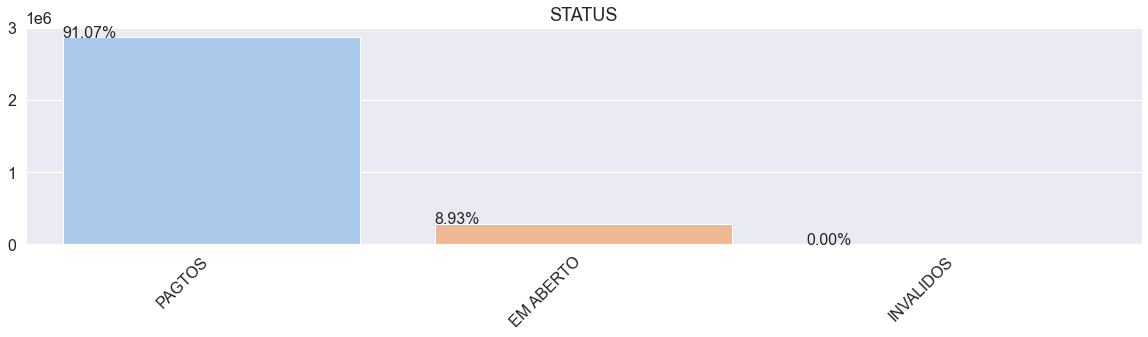

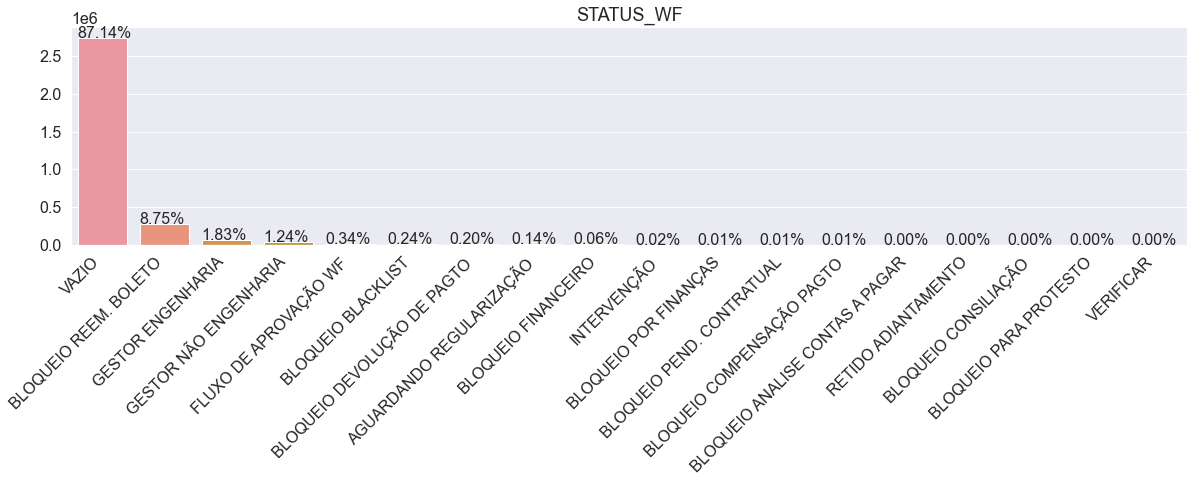

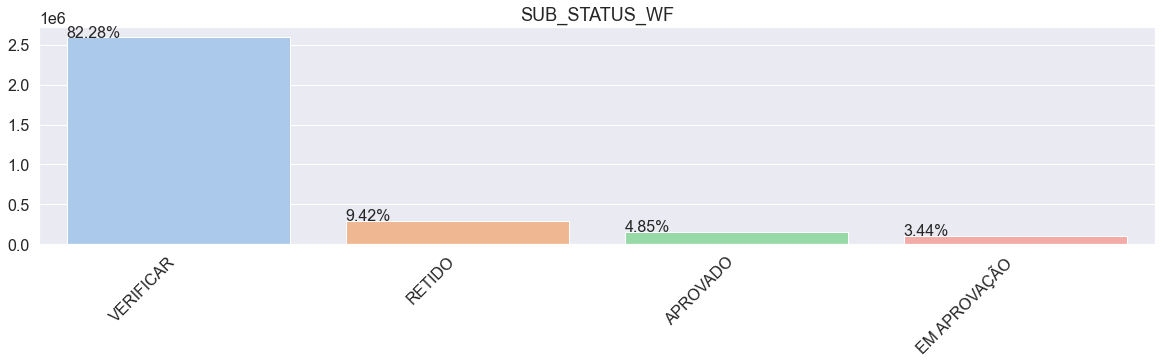

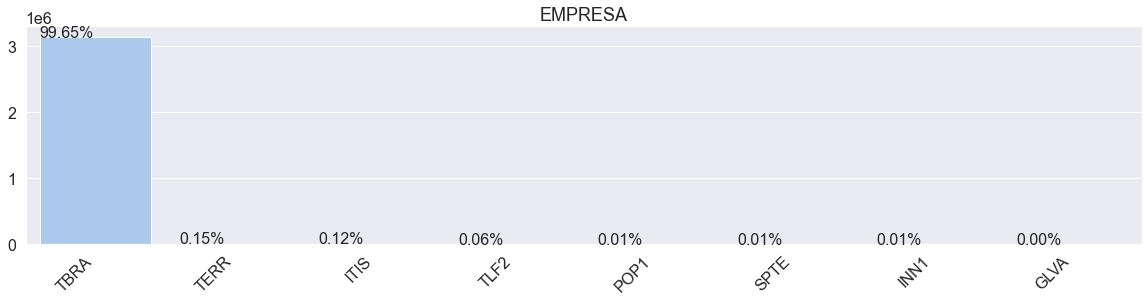

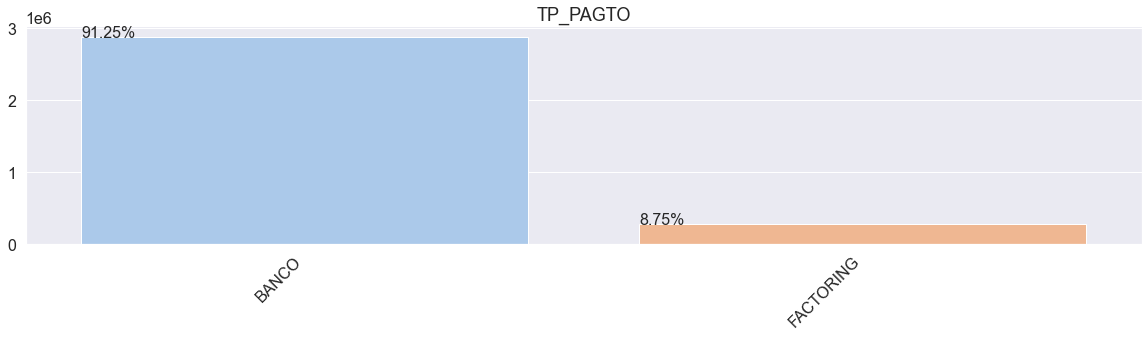

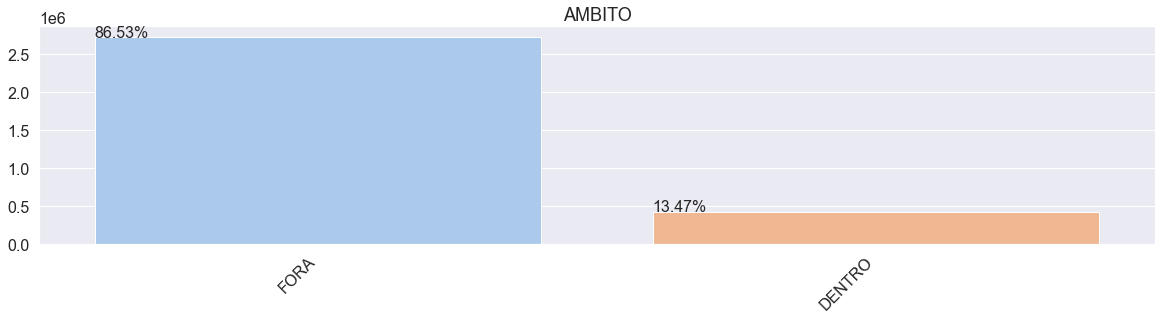

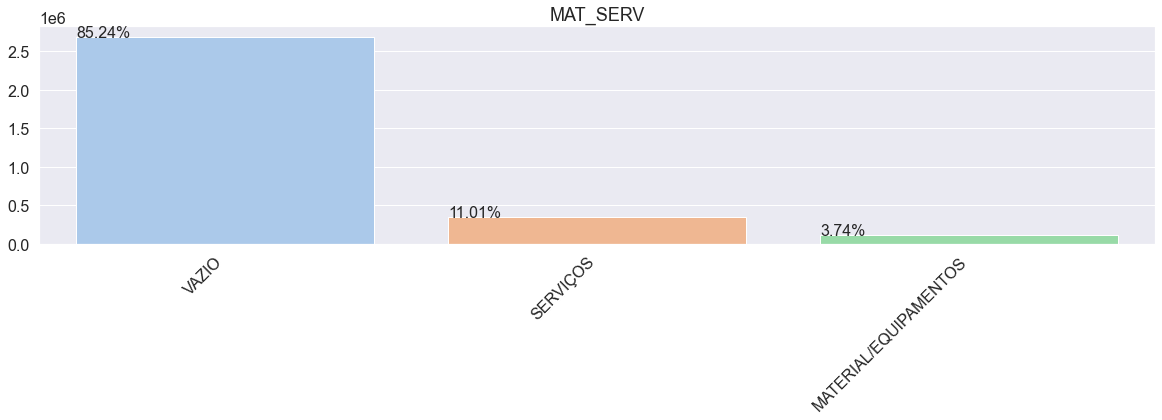

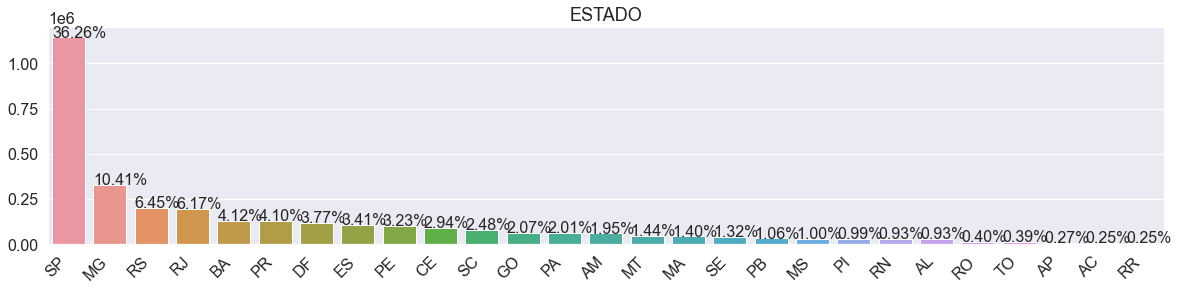

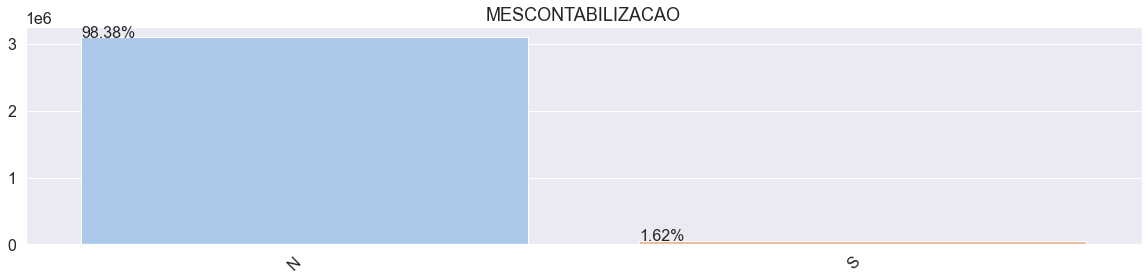

In [38]:
for i in pagto.columns:
    if pagto[i].dtypes=='object':
        countplotfeature(pagto[[i]], i)


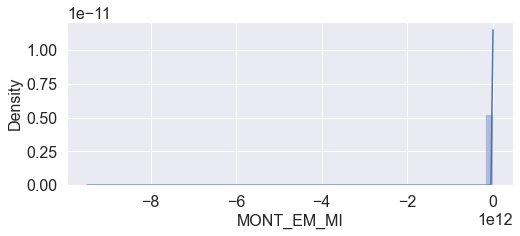

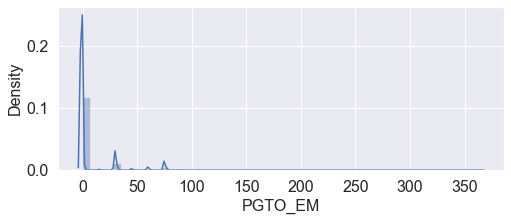

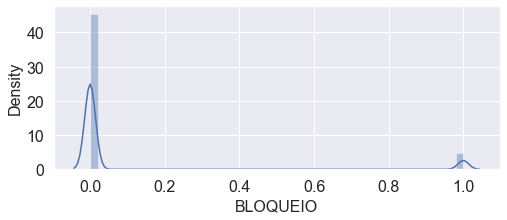

In [39]:
for i in pagto.columns:
    if 'int' in str(pagto[i].dtypes) or 'float' in str(pagto[i].dtypes):
        distplotfeature(pagto[[i]], i)


In [40]:
pagto.reset_index(drop=False, inplace=True)
pagto.COMPETENCIA = pagto.COMPETENCIA.dt.date
pagto.head(3)

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,STATUS,STATUS_WF,SUB_STATUS_WF,EMPRESA,MONT_EM_MI,ANOMES,PGTO_EM,TP_PAGTO,AMBITO,MAT_SERV,BLOQUEIO,ESTADO,MESCONTABILIZACAO
0,14068018,VAZIO,2022-08-01,80300000,EM ABERTO,VAZIO,APROVADO,GLVA,-238718.39,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,SP,N
1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2021-12-01,400000057,EM ABERTO,VAZIO,APROVADO,INN1,-167.01,1999-01-01,75.0,BANCO,DENTRO,SERVIÇOS,0,PR,N
2,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2022-04-01,400000016,EM ABERTO,VAZIO,APROVADO,INN1,-60.61,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,SP,N


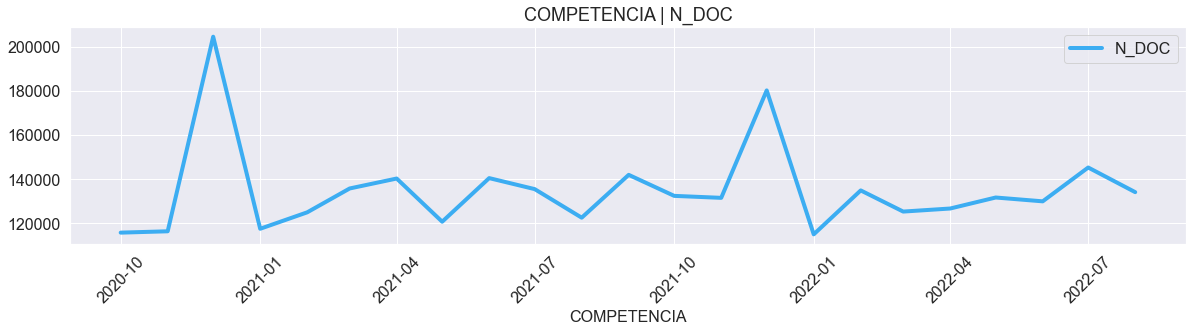

In [41]:
ax = pagto[['COMPETENCIA', 'N_DOC']] \
                .groupby(['COMPETENCIA']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA']) \
                .plot(x='COMPETENCIA', y='N_DOC', color='#3CADF2', linewidth=4, figsize=(20, 4))

ax.tick_params(axis='x', rotation=45)
plt.title('COMPETENCIA | N_DOC')
plt.show()

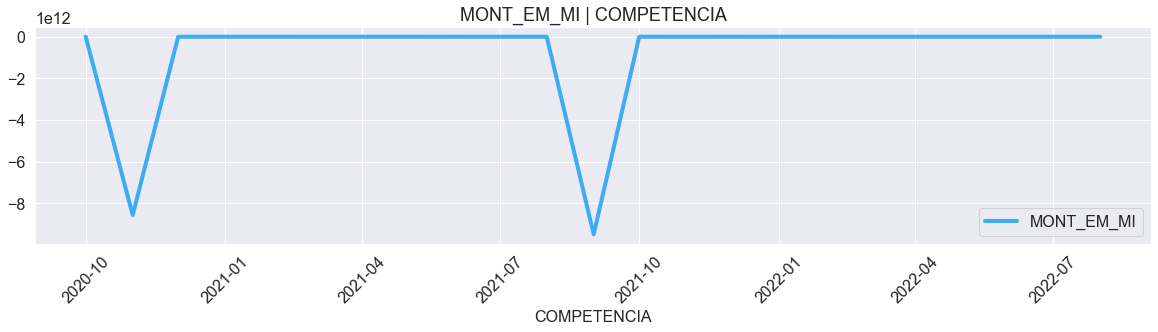

In [42]:
ax = pagto[['COMPETENCIA', 'MONT_EM_MI']] \
                .groupby(['COMPETENCIA']) \
                .agg({'MONT_EM_MI':'sum'}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA']) \
                .plot(x='COMPETENCIA', y='MONT_EM_MI', color='#3CADF2', linewidth=4, figsize=(20, 4))

ax.tick_params(axis='x', rotation=45)
plt.title('MONT_EM_MI | COMPETENCIA')
plt.show()

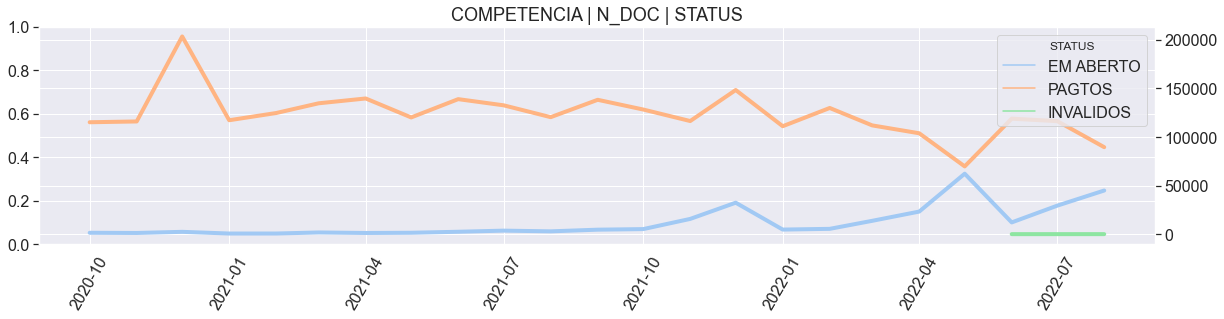

In [43]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="N_DOC", hue='STATUS', 
                linewidth=4, 
                data=pagto[['COMPETENCIA', 'STATUS', 'N_DOC']] \
                .groupby(['COMPETENCIA', 'STATUS']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA', 'STATUS']))

ax.tick_params(axis='x', rotation=60)
plt.title('COMPETENCIA | N_DOC | STATUS')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

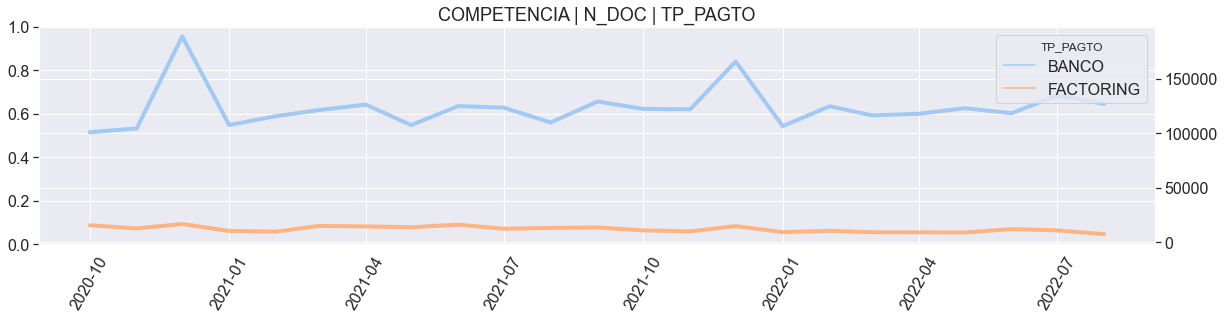

In [44]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="N_DOC", hue='TP_PAGTO', 
                linewidth=4, 
                data=pagto[['COMPETENCIA', 'TP_PAGTO', 'N_DOC']] \
                .groupby(['COMPETENCIA', 'TP_PAGTO']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA', 'TP_PAGTO']))

ax.tick_params(axis='x', rotation=60)
plt.title('COMPETENCIA | N_DOC | TP_PAGTO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

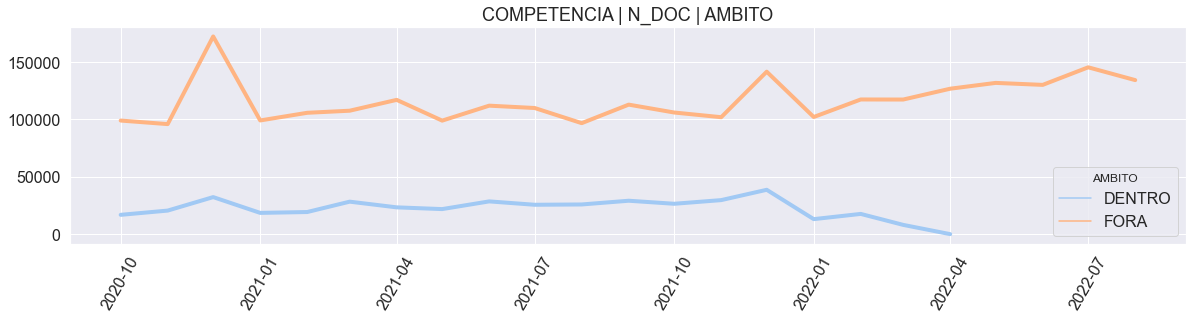

In [45]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.lineplot(x="COMPETENCIA", y="N_DOC", hue='AMBITO', 
                linewidth=4, 
                data=pagto[['COMPETENCIA', 'AMBITO', 'N_DOC']] \
                .groupby(['COMPETENCIA', 'AMBITO']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA', 'AMBITO']))

ax.tick_params(axis='x', rotation=60)
plt.title('COMPETENCIA | N_DOC | AMBITO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

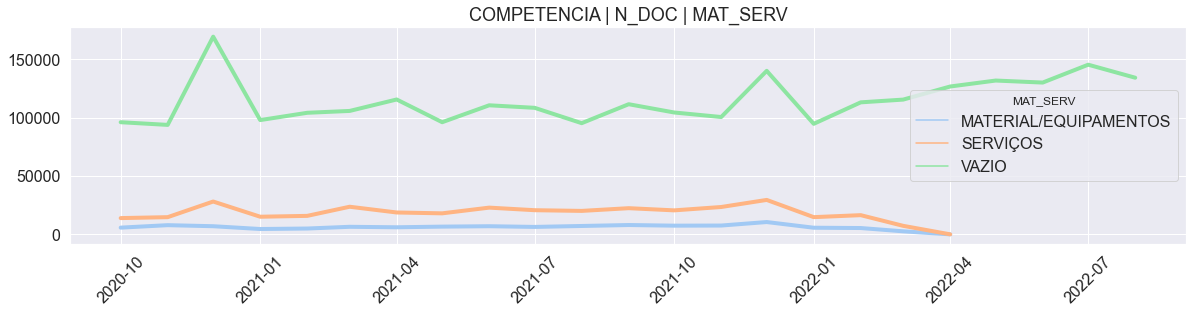

In [46]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.lineplot(x="COMPETENCIA", y="N_DOC", hue='MAT_SERV', 
                linewidth=4, 
                data=pagto[['COMPETENCIA', 'MAT_SERV', 'N_DOC']] \
                .groupby(['COMPETENCIA', 'MAT_SERV']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA', 'MAT_SERV']))

ax.tick_params(axis='x', rotation=45)
plt.title('COMPETENCIA | N_DOC | MAT_SERV')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

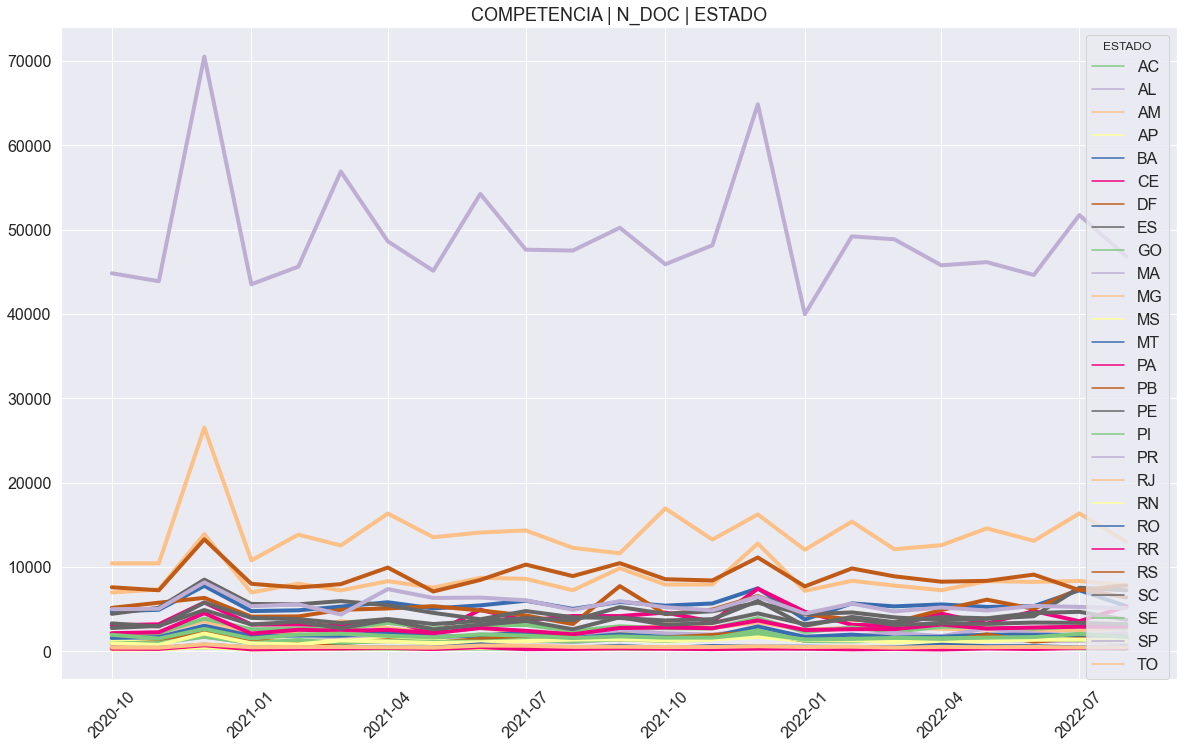

In [47]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.lineplot(x="COMPETENCIA", y="N_DOC", hue='ESTADO', 
                linewidth=4, palette="Accent",
                data=pagto[['COMPETENCIA', 'ESTADO', 'N_DOC']] \
                .groupby(['COMPETENCIA', 'ESTADO']) \
                .agg({'N_DOC':lambda x: x.nunique()}) \
                .reset_index(drop=False) \
                .sort_values(by=['COMPETENCIA', 'ESTADO']))

ax.tick_params(axis='x', rotation=45)
plt.title('COMPETENCIA | N_DOC | ESTADO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [48]:
pagto.head(3)

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,STATUS,STATUS_WF,SUB_STATUS_WF,EMPRESA,MONT_EM_MI,ANOMES,PGTO_EM,TP_PAGTO,AMBITO,MAT_SERV,BLOQUEIO,ESTADO,MESCONTABILIZACAO
0,14068018,VAZIO,2022-08-01,80300000,EM ABERTO,VAZIO,APROVADO,GLVA,-238718.39,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,SP,N
1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2021-12-01,400000057,EM ABERTO,VAZIO,APROVADO,INN1,-167.01,1999-01-01,75.0,BANCO,DENTRO,SERVIÇOS,0,PR,N
2,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2022-04-01,400000016,EM ABERTO,VAZIO,APROVADO,INN1,-60.61,1999-01-01,-1.0,BANCO,FORA,VAZIO,0,SP,N


#### Modelagem para análises por competência:

In [49]:
def getdummies(col_unique):
    return list(map(lambda x: normalize('NFKD', x.upper().replace('.','').replace(',','').replace('/','').replace('-','').replace(' ','_')).encode('ASCII', 'ignore').decode('ASCII'), col_unique))

def preprocessdummies(df, column):
    column = column
    cols = getdummies(df[df[column].str.contains('VAZIO')==False][column].unique())
    for i in cols:
        df['{}_{}'.format(column, i)] = df[column].apply(lambda x: 1 if x.upper() == i else 0)

    return df.drop(column, axis=1)


In [50]:
df = pagto.set_index(['FORNECEDOR','NOME_UNICO','COMPETENCIA','N_DOC'])
df.head(3)

STATUS STATUS_WF SUB_STATUS_WF EMPRESA  MONT_EM_MI     ANOMES  PGTO_EM TP_PAGTO  AMBITO  MAT_SERV  BLOQUEIO ESTADO MESCONTABILIZACAO
FORNECEDOR NOME_UNICO                           COMPETENCIA N_DOC                                                                                                                                             
14068018   VAZIO                                2022-08-01  80300000   EM ABERTO     VAZIO      APROVADO    GLVA  -238718.39 1999-01-01     -1.0    BANCO    FORA     VAZIO         0     SP                 N
14004271   UNITECH RIO COMERCIO E SERVICOS LTDA 2021-12-01  400000057  EM ABERTO     VAZIO      APROVADO    INN1     -167.01 1999-01-01     75.0    BANCO  DENTRO  SERVIÇOS         0     PR                 N
                                                2022-04-01  400000016  EM ABERTO     VAZIO      APROVADO    INN1      -60.61 1999-01-01     -1.0    BANCO    FORA     VAZIO         0     SP                 N

In [51]:
for i in df.columns:
    if df[i].dtypes=='object':
        df = preprocessdummies(df, i)

df.head(3)

MONT_EM_MI     ANOMES  PGTO_EM  BLOQUEIO  STATUS_EM_ABERTO  STATUS_INVALIDOS  STATUS_PAGTOS  STATUS_WF_AGUARDANDO_REGULARIZACAO  STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR  STATUS_WF_BLOQUEIO_BLACKLIST  STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO  STATUS_WF_BLOQUEIO_CONSILIACAO  STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO  STATUS_WF_BLOQUEIO_FINANCEIRO  STATUS_WF_BLOQUEIO_PEND_CONTRATUAL  STATUS_WF_BLOQUEIO_POR_FINANCAS  STATUS_WF_FLUXO_DE_APROVACAO_WF  STATUS_WF_GESTOR_ENGENHARIA  STATUS_WF_GESTOR_NAO_ENGENHARIA  STATUS_WF_INTERVENCAO  STATUS_WF_RETIDO_ADIANTAMENTO  STATUS_WF_VERIFICAR  STATUS_WF_BLOQUEIO_PARA_PROTESTO  STATUS_WF_BLOQUEIO_REEM_BOLETO  SUB_STATUS_WF_APROVADO  SUB_STATUS_WF_RETIDO  SUB_STATUS_WF_EM_APROVACAO  SUB_STATUS_WF_VERIFICAR  EMPRESA_GLVA  EMPRESA_INN1  EMPRESA_ITIS  EMPRESA_POP1  EMPRESA_SPTE  EMPRESA_TBRA  EMPRESA_TERR  EMPRESA_TLF2  TP_PAGTO_BANCO  TP_PAGTO_FACTORING  AMBITO_FORA  AMBITO_DENTRO  \
FORNECEDOR NOME_UNICO                           COMPETENCIA N_DOC                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
14068018   VAZIO                                2022-08-01  80300000   -238718.39 1999-01-01     -1.0         0                 0                 0              0                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       1                     0                           0                        0             1             0             0             0             0             0             0             0               1                   0            1              0   
14004271   UNITECH RIO COMERCIO E SERVICOS LTDA 2021-12-01  400000057     -167.01 1999-01-01     75.0         0                 0                 0              0                                   0                                          0                             0                                     0                               0                                      0                              0                                   0                                0                                0                            0                                0                      0                              0                    0                                 0                               0                       1                     0                           0                        0             0             1             0             0             0             0             0             0               1                   0            0              1   
                                                2022-04-01  400000016      -60.61 1999-01-0

In [52]:
bloqueio = [0, 1]

for i in bloqueio:
    df['BLOQUEIO_{}'.format('SIM' if i ==  1 else 'NAO')] = df['BLOQUEIO'].apply(lambda x: 1 if x == i else 0)
    df['BLOQUEIO_{}_MONT_EM_MI'.format('SIM' if i ==  1 else 'NAO')] = df.apply(lambda x: x.MONT_EM_MI if x.BLOQUEIO == i else 0, axis=1)

df.drop('BLOQUEIO', axis=1, inplace=True)

In [53]:
df['TP_PAGTO_FACTORING_MONT_EM_MI'] = df.apply(lambda x: x.MONT_EM_MI if x.TP_PAGTO_FACTORING > 0 else 0, axis=1)

In [54]:
df.reset_index(drop=False, inplace=True)
df.head(3)

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,MONT_EM_MI,ANOMES,PGTO_EM,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,TP_PAGTO_FACTORING_MONT_EM_MI
0,14068018,VAZIO,2022-08-01,80300000,-238718.39,1999-01-01,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-238718.39,0,0.0,0.0
1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2021-12-01,400000057,-167.01,1999-01-01,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-167.01,0,0.0,0.0
2,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2022-04-01,400000016,-60.61,1999-01-01,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-60.61,0,0.0,0.0


In [55]:
df['ANOMES_COMPETENCIA'] = df.apply(lambda x: 1 if x.ANOMES == x.COMPETENCIA else 0, axis=1)
df.drop(['ANOMES'], axis=1, inplace=True)
df.rename({'ANOMES_COMPETENCIA':'ANOMES'}, axis=1, inplace=True)
df.head(3)

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,MONT_EM_MI,PGTO_EM,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,TP_PAGTO_FACTORING_MONT_EM_MI,ANOMES
0,14068018,VAZIO,2022-08-01,80300000,-238718.39,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-238718.39,0,0.0,0.0,0
1,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2021-12-01,400000057,-167.01,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-167.01,0,0.0,0.0,0
2,14004271,UNITECH RIO COMERCIO E SERVICOS LTDA,2022-04-01,400000016,-60.61,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,-60.61,0,0.0,0.0,0


In [56]:
print(len(df.columns))

display(df.columns)

79


Index(['FORNECEDOR', 'NOME_UNICO', 'COMPETENCIA', 'N_DOC', 'MONT_EM_MI', 'PGTO_EM', 'STATUS_EM_ABERTO', 'STATUS_INVALIDOS', 'STATUS_PAGTOS', 'STATUS_WF_AGUARDANDO_REGULARIZACAO', 'STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR', 'STATUS_WF_BLOQUEIO_BLACKLIST', 'STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO', 'STATUS_WF_BLOQUEIO_CONSILIACAO', 'STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO', 'STATUS_WF_BLOQUEIO_FINANCEIRO', 'STATUS_WF_BLOQUEIO_PEND_CONTRATUAL', 'STATUS_WF_BLOQUEIO_POR_FINANCAS', 'STATUS_WF_FLUXO_DE_APROVACAO_WF', 'STATUS_WF_GESTOR_ENGENHARIA', 'STATUS_WF_GESTOR_NAO_ENGENHARIA', 'STATUS_WF_INTERVENCAO', 'STATUS_WF_RETIDO_ADIANTAMENTO', 'STATUS_WF_VERIFICAR', 'STATUS_WF_BLOQUEIO_PARA_PROTESTO', 'STATUS_WF_BLOQUEIO_REEM_BOLETO', 'SUB_STATUS_WF_APROVADO', 'SUB_STATUS_WF_RETIDO', 'SUB_STATUS_WF_EM_APROVACAO', 'SUB_STATUS_WF_VERIFICAR', 'EMPRESA_GLVA', 'EMPRESA_INN1', 'EMPRESA_ITIS', 'EMPRESA_POP1', 'EMPRESA_SPTE', 'EMPRESA_TBRA', 'EMPRESA_TERR', 'EMPRESA_TLF2', 'TP_PAGTO_BANCO',
       'TP_PAGTO_F

In [57]:
df = df.groupby(['FORNECEDOR', 'NOME_UNICO', 'COMPETENCIA']) \
    .agg({
        'N_DOC': lambda x: x.nunique(),
        'ANOMES':'sum',
        'MONT_EM_MI':'sum', 'PGTO_EM':'sum', 
        'BLOQUEIO_NAO':'sum', 'BLOQUEIO_NAO_MONT_EM_MI':'sum', 
        'BLOQUEIO_SIM':'sum', 'BLOQUEIO_SIM_MONT_EM_MI':'sum',
        'STATUS_EM_ABERTO':'sum', 'STATUS_INVALIDOS':'sum', 'STATUS_PAGTOS':'sum', 
        'STATUS_WF_AGUARDANDO_REGULARIZACAO':'sum', 'STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR':'sum', 
        'STATUS_WF_BLOQUEIO_BLACKLIST':'sum', 'STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO':'sum',
        'STATUS_WF_BLOQUEIO_CONSILIACAO':'sum', 'STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO':'sum', 
        'STATUS_WF_BLOQUEIO_FINANCEIRO':'sum', 'STATUS_WF_BLOQUEIO_PEND_CONTRATUAL':'sum', 
        'STATUS_WF_BLOQUEIO_POR_FINANCAS':'sum', 'STATUS_WF_FLUXO_DE_APROVACAO_WF':'sum', 
        'STATUS_WF_GESTOR_ENGENHARIA':'sum', 'STATUS_WF_GESTOR_NAO_ENGENHARIA':'sum', 
        'STATUS_WF_INTERVENCAO':'sum', 'STATUS_WF_RETIDO_ADIANTAMENTO':'sum', 
        'STATUS_WF_VERIFICAR':'sum', 'STATUS_WF_BLOQUEIO_PARA_PROTESTO':'sum', 
        'STATUS_WF_BLOQUEIO_REEM_BOLETO':'sum', 'SUB_STATUS_WF_APROVADO':'sum', 
        'SUB_STATUS_WF_RETIDO':'sum', 'SUB_STATUS_WF_EM_APROVACAO':'sum', 
        'SUB_STATUS_WF_VERIFICAR':'sum', 
        'EMPRESA_GLVA':'sum', 'EMPRESA_INN1':'sum', 'EMPRESA_ITIS':'sum', 
        'EMPRESA_POP1':'sum', 'EMPRESA_SPTE':'sum', 'EMPRESA_TBRA':'sum', 
        'EMPRESA_TERR':'sum', 'EMPRESA_TLF2':'sum', 'TP_PAGTO_BANCO':'sum',
        'TP_PAGTO_FACTORING':'sum', 
        'TP_PAGTO_FACTORING_MONT_EM_MI':'sum',
        'AMBITO_FORA':'sum', 'AMBITO_DENTRO':'sum', 
        'MAT_SERV_SERVICOS':'sum', 'MAT_SERV_MATERIALEQUIPAMENTOS':'sum', 
        'ESTADO_SP':'sum', 'ESTADO_PR':'sum', 'ESTADO_ES':'sum', 'ESTADO_RS':'sum', 
        'ESTADO_RJ':'sum', 'ESTADO_MG':'sum', 'ESTADO_PE':'sum', 'ESTADO_PI':'sum', 
        'ESTADO_MT':'sum', 'ESTADO_AM':'sum', 'ESTADO_BA':'sum', 'ESTADO_SC':'sum', 
        'ESTADO_GO':'sum', 'ESTADO_PA':'sum', 'ESTADO_TO':'sum', 'ESTADO_DF':'sum', 
        'ESTADO_CE':'sum', 'ESTADO_AC':'sum', 'ESTADO_RO':'sum', 'ESTADO_MS':'sum', 
        'ESTADO_PB':'sum', 'ESTADO_MA':'sum', 'ESTADO_AP':'sum', 'ESTADO_SE':'sum', 
        'ESTADO_AL':'sum', 'ESTADO_RN':'sum', 'ESTADO_RR':'sum', 
        'MESCONTABILIZACAO_N':'sum', 'MESCONTABILIZACAO_S':'sum'
    }) \
    .reset_index(drop=False) \
    .sort_values(by=['FORNECEDOR', 'NOME_UNICO', 'COMPETENCIA'])

df.head(3)

,FORNECEDOR,NOME_UNICO,COMPETENCIA,N_DOC,ANOMES,MONT_EM_MI,PGTO_EM,BLOQUEIO_NAO,BLOQUEIO_NAO_MONT_EM_MI,BLOQUEIO_SIM,BLOQUEIO_SIM_MONT_EM_MI,STATUS_EM_ABERTO,STATUS_INVALIDOS,STATUS_PAGTOS,STATUS_WF_AGUARDANDO_REGULARIZACAO,STATUS_WF_BLOQUEIO_ANALISE_CONTAS_A_PAGAR,STATUS_WF_BLOQUEIO_BLACKLIST,STATUS_WF_BLOQUEIO_COMPENSACAO_PAGTO,STATUS_WF_BLOQUEIO_CONSILIACAO,STATUS_WF_BLOQUEIO_DEVOLUCAO_DE_PAGTO,STATUS_WF_BLOQUEIO_FINANCEIRO,STATUS_WF_BLOQUEIO_PEND_CONTRATUAL,STATUS_WF_BLOQUEIO_POR_FINANCAS,STATUS_WF_FLUXO_DE_APROVACAO_WF,STATUS_WF_GESTOR_ENGENHARIA,STATUS_WF_GESTOR_NAO_ENGENHARIA,STATUS_WF_INTERVENCAO,STATUS_WF_RETIDO_ADIANTAMENTO,STATUS_WF_VERIFICAR,STATUS_WF_BLOQUEIO_PARA_PROTESTO,STATUS_WF_BLOQUEIO_REEM_BOLETO,SUB_STATUS_WF_APROVADO,SUB_STATUS_WF_RETIDO,SUB_STATUS_WF_EM_APROVACAO,SUB_STATUS_WF_VERIFICAR,EMPRESA_GLVA,EMPRESA_INN1,EMPRESA_ITIS,EMPRESA_POP1,EMPRESA_SPTE,EMPRESA_TBRA,EMPRESA_TERR,EMPRESA_TLF2,TP_PAGTO_BANCO,TP_PAGTO_FACTORING,TP_PAGTO_FACTORING_MONT_EM_MI,AMBITO_FORA,AMBITO_DENTRO,MAT_SERV_SERVICOS,MAT_SERV_MATERIALEQUIPAMENTOS,ESTADO_SP,ESTADO_PR,ESTADO_ES,ESTADO_RS,ESTADO_RJ,ESTADO_MG,ESTADO_PE,ESTADO_PI,ESTADO_MT,ESTADO_AM,ESTADO_BA,ESTADO_SC,ESTADO_GO,ESTADO_PA,ESTADO_TO,ESTADO_DF,ESTADO_CE,ESTADO_AC,ESTADO_RO,ESTADO_MS,ESTADO_PB,ESTADO_MA,ESTADO_AP,ESTADO_SE,ESTADO_AL,ESTADO_RN,ESTADO_RR,MESCONTABILIZACAO_N,MESCONTABILIZACAO_S
0,10000001,VAZIO,2021-01-01,1,1,-43120.91,-1.0,1,-43120.91,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,10000004,CONDOMINIO DO EDIFICIO CABEDELO,2020-10-01,4,2,-15571.65,-4.0,4,-15571.65,0,0.0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,4,0,0,4,0,0.0,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
2,10000004,CONDOMINIO DO EDIFICIO CABEDELO,2020-11-01,1,0,-4938.05,-1.0,1,-4938.05,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


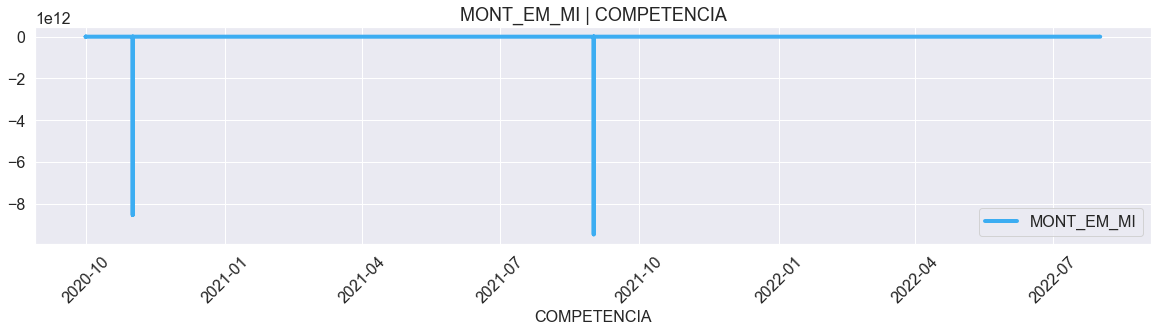

In [58]:
ax = df.plot(x='COMPETENCIA', y='MONT_EM_MI', color='#3CADF2', linewidth=4, figsize=(20, 4))

ax.tick_params(axis='x', rotation=45)
plt.title('MONT_EM_MI | COMPETENCIA')
plt.show()

### SALVAR DADOS:

In [59]:
df.to_csv(r'datasets/02_PAGTO.csv', index = False, sep=';', encoding='utf-8', header='true')

In [60]:
#del df

### POC:

- Uma ideia de modelagem envolve a previsão das características utilizadas na construção do indicador. Dessa forma, poderíamos criar uma "projeção do indicador futuro", ou seja, poder prever qual será o indicador nas competências futuras.
- Naturalmente essa modelo reflete uma "poc" preliminar, para experimentar a modelagem.

In [105]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm
from sklearn.metrics import *

In [62]:
def validation_metrics(y_true, y_pred):
    _mape = np.mean(np.abs((y_true - y_pred) / y_true )) * 100
    _rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    _mae = np.mean(np.abs(y_pred - y_true))

    print('MAPE: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(_mape, _rmse, _mae))


### Previsão para o número de documentos por competência:

In [63]:
X = df[['COMPETENCIA', 'N_DOC']].copy()
X = X.groupby('COMPETENCIA').sum().sort_values(by='COMPETENCIA').reset_index(drop=False)
X.head()

,COMPETENCIA,N_DOC
0,2020-10-01,116070
1,2020-11-01,116639
2,2020-12-01,204682
3,2021-01-01,118119
4,2021-02-01,125273


In [64]:
temp = pd.DataFrame(pd.date_range(start='2022-09-01', periods=4, freq='M'), columns=['COMPETENCIA'])
temp['COMPETENCIA'] = pd.to_datetime(temp['COMPETENCIA'].dt.strftime('%Y-%m-01'))
temp['N_DOC'] = np.nan

X = pd.concat([X, temp]).reset_index(drop=True)
X['COMPETENCIA'] = pd.to_datetime(X['COMPETENCIA'])
del temp
X.tail(6)

,COMPETENCIA,N_DOC
21,2022-07-01,145495.0
22,2022-08-01,134431.0
23,2022-09-01,NaN
24,2022-10-01,NaN
25,2022-11-01,NaN
26,2022-12-01,NaN


In [65]:
dt_train_test = dt.datetime(2022, 4, 1)

xtrain = X[(X['COMPETENCIA'] < dt_train_test)][['COMPETENCIA', 'N_DOC']]
xtest = X.loc[(X['COMPETENCIA'] >= dt_train_test)][['COMPETENCIA', 'N_DOC']]

len(xtrain), len(xtest)

(18, 9)

In [66]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(xtrain['N_DOC'].values.reshape(-1, 1))
xtrain['N_DOC'] = scaler_data

xtrain.head(3)

,COMPETENCIA,N_DOC
0,2020-10-01,0.004516
1,2020-11-01,0.010908
2,2020-12-01,1.000000


In [67]:
index_test_start = xtest.index.min()
index_test_end = xtest.index.max()

print('Test index interval: ', index_test_start, ' até ', index_test_end)

Test index interval:  18  até  26


In [68]:
model_aar = auto_arima(xtrain['N_DOC'], 
                    start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, 
                    seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                    suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2.574, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4.574, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=6.574, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4.574, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=6.574, Time=0.03 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=8.574, Time=0.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6.574, Time=0.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=8.574, Time=0.05 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=10.574, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2.919, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4.919, Time=0.09 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4.919, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6.919, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=8.919, Time=0.28 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AI

In [69]:
model_aar.aic()

1.2889362528313804

In [70]:
model_aar.fit(xtrain['N_DOC'])

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [71]:
xtest['PRED'] = model_aar.predict(n_periods=9)
xtest['PRED'] = scaler.inverse_transform(xtest['PRED'].values.reshape(-1, 1))
xtest

,COMPETENCIA,N_DOC,PRED
18,2022-04-01,127000.0,131130.760411
19,2022-05-01,132083.0,129418.506176
20,2022-06-01,130253.0,137741.592002
21,2022-07-01,145495.0,123353.398367
22,2022-08-01,134431.0,126399.105763
23,2022-09-01,NaN,144784.435027
24,2022-10-01,NaN,121387.653673
25,2022-11-01,NaN,129559.071626
26,2022-12-01,NaN,185357.303838


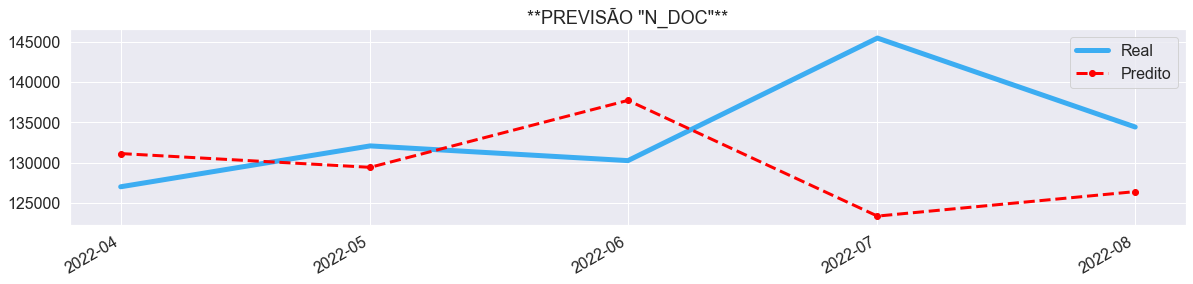

In [72]:
fig = plt.figure(figsize=(20, 4))

x = xtest[(~xtest['N_DOC'].isna())]['COMPETENCIA']
y1 = xtest[(~xtest['N_DOC'].isna())]['N_DOC']
y2 = xtest[(~xtest['N_DOC'].isna())]['PRED']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=5)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "N_DOC"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [73]:
r = xtrain.copy()
r['N_DOC'] = scaler.inverse_transform(r['N_DOC'].values.reshape(-1, 1))
r = pd.concat([r[:index_test_start], xtest])

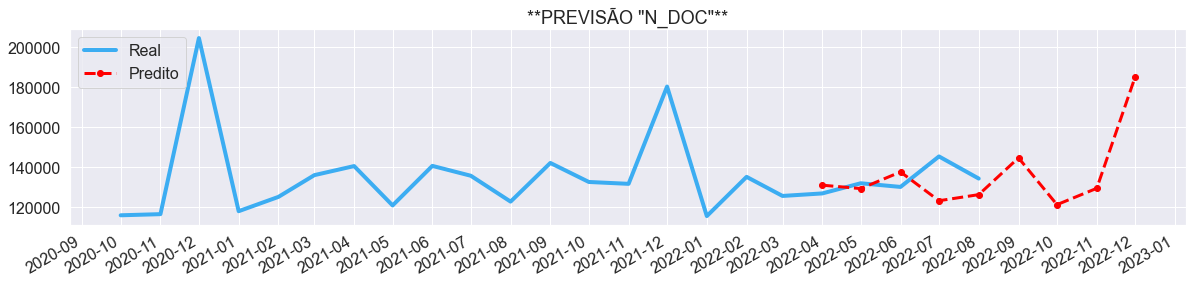

In [74]:
fig = plt.figure(figsize=(20, 4))

x = r['COMPETENCIA']
y1 = r['N_DOC']
y2 = r['PRED']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=4)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "N_DOC"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [75]:
y_true = xtest[~xtest['N_DOC'].isna()]['N_DOC'].values
y_pred = xtest[~xtest['N_DOC'].isna()]['PRED'].values

validation_metrics(y_true, y_pred)

MAPE: 6.44, MSE: 11269.46, MAE: 8891.47


In [76]:
del X
del xtrain
del xtest

### Previsão para o 'montante em mi' de documentos por competência:

In [194]:
#X = df[['COMPETENCIA', 'MONT_EM_MI']].copy()
X = df[['COMPETENCIA','MONT_EM_MI','BLOQUEIO_SIM','TP_PAGTO_FACTORING_MONT_EM_MI']].copy()
X = X.groupby('COMPETENCIA').sum().sort_values(by='COMPETENCIA').reset_index(drop=False)
X.head()

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI
0,2020-10-01,-2.922966e+09,16369,-5.052214e+08
1,2020-11-01,-8.554079e+12,13106,-4.620394e+08
2,2020-12-01,-3.792974e+09,17171,-6.014363e+08
3,2021-01-01,-2.765849e+09,10699,-4.779585e+08
4,2021-02-01,-2.813341e+09,10014,-4.219279e+08


In [195]:
temp = pd.DataFrame(pd.date_range(start='2022-09-01', periods=4, freq='M'), columns=['COMPETENCIA'])
temp['COMPETENCIA'] = pd.to_datetime(temp['COMPETENCIA'].dt.strftime('%Y-%m-01'))
temp['MONT_EM_MI'] = np.nan
temp['BLOQUEIO_SIM'] = np.nan
temp['TP_PAGTO_FACTORING_MONT_EM_MI'] = np.nan

X = pd.concat([X, temp]).reset_index(drop=True)
X['COMPETENCIA'] = pd.to_datetime(X['COMPETENCIA'])
del temp
X.tail(6)

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI
21,2022-07-01,-3.712141e+09,11335.0,-5.337190e+08
22,2022-08-01,-3.488753e+09,8978.0,-3.941165e+08
23,2022-09-01,NaN,NaN,NaN
24,2022-10-01,NaN,NaN,NaN
25,2022-11-01,NaN,NaN,NaN
26,2022-12-01,NaN,NaN,NaN


In [196]:
dt_train_test = dt.datetime(2022, 4, 1)

xtrain = X[(X['COMPETENCIA'] < dt_train_test)][['COMPETENCIA', 'MONT_EM_MI', 'BLOQUEIO_SIM', 'TP_PAGTO_FACTORING_MONT_EM_MI']]
xtest = X.loc[(X['COMPETENCIA'] >= dt_train_test)][['COMPETENCIA', 'MONT_EM_MI',  'BLOQUEIO_SIM', 'TP_PAGTO_FACTORING_MONT_EM_MI']]

len(xtrain), len(xtest)

(18, 9)

In [197]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(xtrain['MONT_EM_MI'].values.reshape(-1, 1))
xtrain['MONT_EM_MI'] = scaler_data

xtrain.head(3)

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI
0,2020-10-01,0.999970,16369.0,-5.052214e+08
1,2020-11-01,0.097832,13106.0,-4.620394e+08
2,2020-12-01,0.999878,17171.0,-6.014363e+08


In [198]:
index_test_start = xtest.index.min()
index_test_end = xtest.index.max()

print('Test index interval: ', index_test_start, ' até ', index_test_end)

Test index interval:  18  até  26


In [199]:
model_aar = auto_arima(xtrain['MONT_EM_MI'], 
                    start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, 
                    seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                    suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10.578, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=12.578, Time=0.02 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=14.578, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=12.578, Time=0.01 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=14.578, Time=0.02 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=16.578, Time=0.05 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=14.578, Time=0.02 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=16.578, Time=0.03 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=18.578, Time=0.08 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=96509.977, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=96511.977, Time=0.06 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=96513.977, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=96511.977, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=96513.977, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=96515.977, Time=0.13 sec
 ARIMA(

In [200]:
model_aar.aic()

10.216306023137404

In [201]:
model_aar.fit(xtrain['MONT_EM_MI'])

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [202]:
xtest['PRED_MONT_EM_MI'] = model_aar.predict(n_periods=9)
xtest['PRED_MONT_EM_MI'] = scaler.inverse_transform(xtest['PRED_MONT_EM_MI'].values.reshape(-1, 1))
xtest

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI
18,2022-04-01,-3.237335e+09,9898.0,-4.045696e+08,-3.038681e+09
19,2022-05-01,-3.079482e+09,10560.0,-4.168540e+08,-2.530500e+09
20,2022-06-01,-3.340038e+09,12493.0,-6.196051e+08,-3.929853e+09
21,2022-07-01,-3.712141e+09,11335.0,-5.337190e+08,-3.049497e+09
22,2022-08-01,-3.488753e+09,8978.0,-3.941165e+08,-2.816535e+09
23,2022-09-01,NaN,NaN,NaN,-9.481359e+12
24,2022-10-01,NaN,NaN,NaN,-2.881365e+09
25,2022-11-01,NaN,NaN,NaN,-3.140178e+09
26,2022-12-01,NaN,NaN,NaN,-4.149921e+09


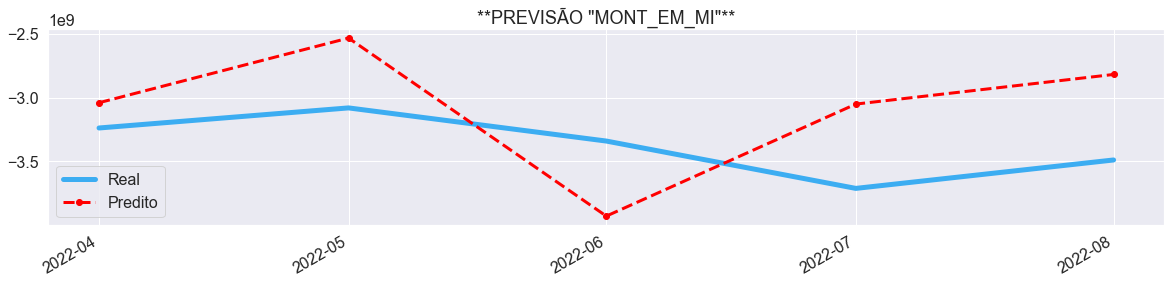

In [203]:
fig = plt.figure(figsize=(20, 4))

x = xtest[(~xtest['MONT_EM_MI'].isna())]['COMPETENCIA']
y1 = xtest[(~xtest['MONT_EM_MI'].isna())]['MONT_EM_MI']
y2 = xtest[(~xtest['MONT_EM_MI'].isna())]['PRED_MONT_EM_MI']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=5)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "MONT_EM_MI"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [204]:
r = xtrain.copy()
r['MONT_EM_MI'] = scaler.inverse_transform(r['MONT_EM_MI'].values.reshape(-1, 1))
r = pd.concat([r[:index_test_start], xtest])

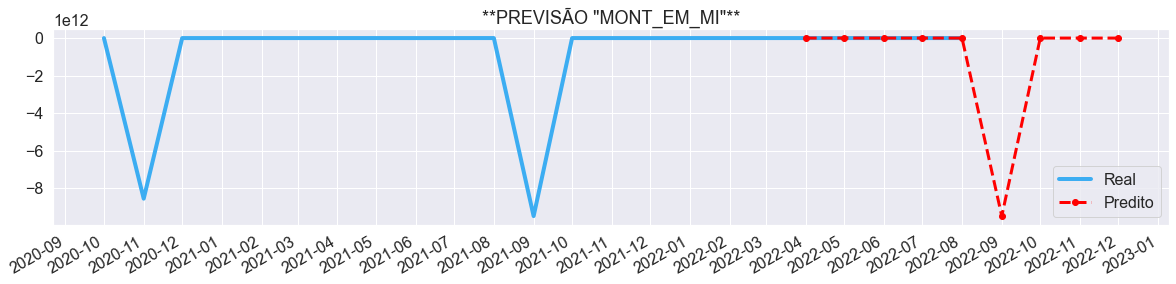

In [205]:
fig = plt.figure(figsize=(20, 4))

x = r['COMPETENCIA']
y1 = r['MONT_EM_MI']
y2 = r['PRED_MONT_EM_MI']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=4)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "MONT_EM_MI"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [206]:
y_true = xtest[~xtest['MONT_EM_MI'].isna()]['MONT_EM_MI'].values
y_pred = xtest[~xtest['MONT_EM_MI'].isna()]['PRED_MONT_EM_MI'].values

validation_metrics(y_true, y_pred)

MAPE: 15.75, MSE: 562085346.26, MAE: 534462557.17


In [207]:
del model_aar

#### Previsão para o 'montante em mi' somente do tipo de pagamento do tipo 'Factoring' por competência:

In [208]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(xtrain['TP_PAGTO_FACTORING_MONT_EM_MI'].values.reshape(-1, 1))
xtrain['TP_PAGTO_FACTORING_MONT_EM_MI'] = scaler_data

xtrain.head(3)

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI
0,2020-10-01,0.999970,16369.0,0.370638
1,2020-11-01,0.097832,13106.0,0.505264
2,2020-12-01,0.999878,17171.0,0.070675


In [209]:
index_test_start = xtest.index.min()
index_test_end = xtest.index.max()

print('Test index interval: ', index_test_start, ' até ', index_test_end)

Test index interval:  18  até  26


In [210]:
model = sm.tsa.statespace.SARIMAX(xtrain['TP_PAGTO_FACTORING_MONT_EM_MI'], order=(1, 1, 0), seasonal_order=(0, 1, 0, 6))
model_fit = model.fit(disp=False)

In [211]:
xtest['PRED_TP_PAGTO_FACTORING_MONT_EM_MI'] = model_fit.predict(start=index_test_start, end=index_test_end, dynamic=True)
xtest['PRED_TP_PAGTO_FACTORING_MONT_EM_MI'] = scaler.inverse_transform(xtest['PRED_TP_PAGTO_FACTORING_MONT_EM_MI'].values.reshape(-1, 1))
xtest

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI
18,2022-04-01,-3.237335e+09,9898.0,-4.045696e+08,-3.038681e+09,-2.884863e+08
19,2022-05-01,-3.079482e+09,10560.0,-4.168540e+08,-2.530500e+09,-1.615669e+08
20,2022-06-01,-3.340038e+09,12493.0,-6.196051e+08,-3.929853e+09,-2.098221e+08
21,2022-07-01,-3.712141e+09,11335.0,-5.337190e+08,-3.049497e+09,-2.797197e+08
22,2022-08-01,-3.488753e+09,8978.0,-3.941165e+08,-2.816535e+09,-2.630156e+08
23,2022-09-01,NaN,NaN,NaN,-9.481359e+12,-2.357701e+08
24,2022-10-01,NaN,NaN,NaN,-2.881365e+09,-1.467073e+08
25,2022-11-01,NaN,NaN,NaN,-3.140178e+09,-1.978793e+07
26,2022-12-01,NaN,NaN,NaN,-4.149921e+09,-6.804309e+07


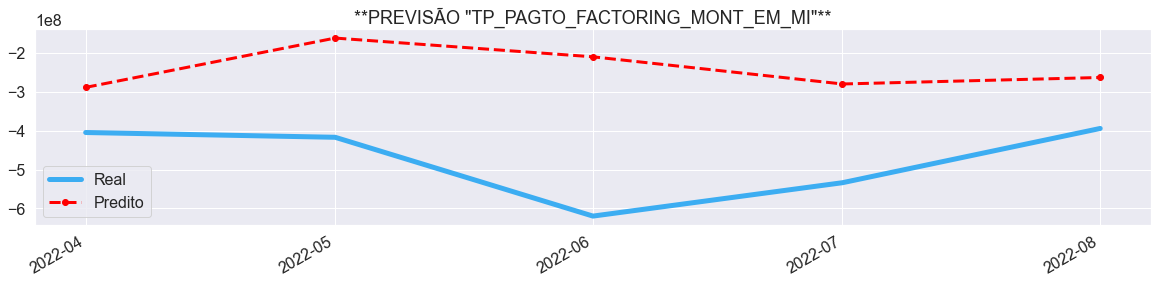

In [214]:
fig = plt.figure(figsize=(20, 4))

x = xtest[(~xtest['MONT_EM_MI'].isna())]['COMPETENCIA']
y1 = xtest[(~xtest['MONT_EM_MI'].isna())]['TP_PAGTO_FACTORING_MONT_EM_MI']
y2 = xtest[(~xtest['MONT_EM_MI'].isna())]['PRED_TP_PAGTO_FACTORING_MONT_EM_MI']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=5)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "TP_PAGTO_FACTORING_MONT_EM_MI"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [215]:
r = xtrain.copy()
r['TP_PAGTO_FACTORING_MONT_EM_MI'] = scaler.inverse_transform(r['TP_PAGTO_FACTORING_MONT_EM_MI'].values.reshape(-1, 1))
r = pd.concat([r[:index_test_start], xtest])

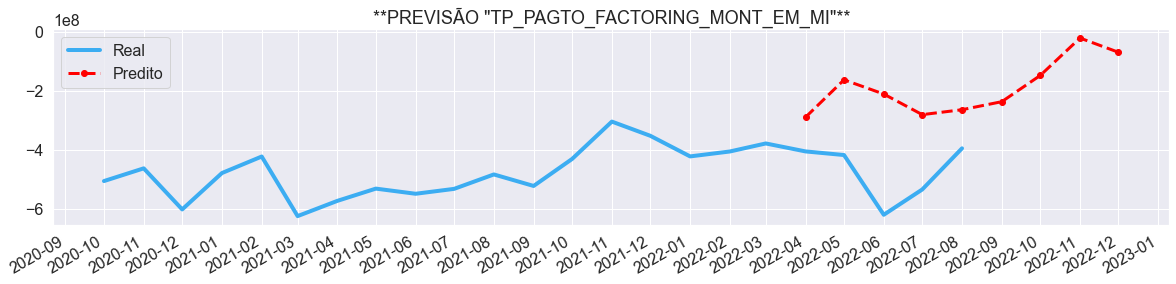

In [216]:
fig = plt.figure(figsize=(20, 4))

x = r['COMPETENCIA']
y1 = r['TP_PAGTO_FACTORING_MONT_EM_MI']
y2 = r['PRED_TP_PAGTO_FACTORING_MONT_EM_MI']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=4)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "TP_PAGTO_FACTORING_MONT_EM_MI"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [217]:
del model
del model_fit

#### Previsão para o 'bloqueio sim' por competência:

In [218]:
model = sm.tsa.statespace.SARIMAX(xtrain['BLOQUEIO_SIM'], order=(1, 1, 0), seasonal_order=(0, 1, 0, 6))
model_fit = model.fit(disp=False)

In [219]:
xtest['PRED_BLOQUEIO_SIM'] = model_fit.predict(start=index_test_start, end=index_test_end, dynamic=True)
xtest

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI,PRED_BLOQUEIO_SIM
18,2022-04-01,-3.237335e+09,9898.0,-4.045696e+08,-3.038681e+09,-2.884863e+08,7889.183847
19,2022-05-01,-3.079482e+09,10560.0,-4.168540e+08,-2.530500e+09,-1.615669e+08,7894.498012
20,2022-06-01,-3.340038e+09,12493.0,-6.196051e+08,-3.929853e+09,-2.098221e+08,12270.327398
21,2022-07-01,-3.712141e+09,11335.0,-5.337190e+08,-3.049497e+09,-2.797197e+08,6326.382606
22,2022-08-01,-3.488753e+09,8978.0,-3.941165e+08,-2.816535e+09,-2.630156e+08,7386.567440
23,2022-09-01,NaN,NaN,NaN,-9.481359e+12,-2.357701e+08,7167.531280
24,2022-10-01,NaN,NaN,NaN,-2.881365e+09,-1.467073e+08,4507.722201
25,2022-11-01,NaN,NaN,NaN,-3.140178e+09,-1.978793e+07,4513.034983
26,2022-12-01,NaN,NaN,NaN,-4.149921e+09,-6.804309e+07,8888.864639


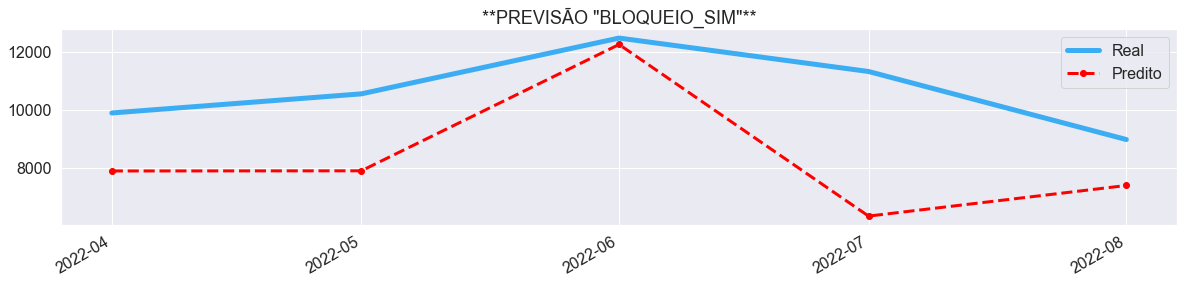

In [220]:
fig = plt.figure(figsize=(20, 4))

x = xtest[(~xtest['MONT_EM_MI'].isna())]['COMPETENCIA']
y1 = xtest[(~xtest['MONT_EM_MI'].isna())]['BLOQUEIO_SIM']
y2 = xtest[(~xtest['MONT_EM_MI'].isna())]['PRED_BLOQUEIO_SIM']

plt.plot(x, y1, label='Real', color='#3CADF2', linewidth=5)
plt.plot(x, y2, label='Predito', color='red', linewidth=3, linestyle='dashed', marker='o')

plt.title('**PREVISÃO "BLOQUEIO_SIM"**')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

In [222]:
r = xtrain.copy()
r['MONT_EM_MI'] = scaler.inverse_transform(r['MONT_EM_MI'].values.reshape(-1, 1))
r['TP_PAGTO_FACTORING_MONT_EM_MI'] = scaler.inverse_transform(r['TP_PAGTO_FACTORING_MONT_EM_MI'].values.reshape(-1, 1))
r = pd.concat([r[:index_test_start], xtest])
r.head()

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI,PRED_BLOQUEIO_SIM
0,2020-10-01,-3.033593e+08,16369.0,-5.052214e+08,NaN,NaN,NaN
1,2020-11-01,-5.927255e+08,13106.0,-4.620394e+08,NaN,NaN,NaN
2,2020-12-01,-3.033887e+08,17171.0,-6.014363e+08,NaN,NaN,NaN
3,2021-01-01,-3.033540e+08,10699.0,-4.779585e+08,NaN,NaN,NaN
4,2021-02-01,-3.033556e+08,10014.0,-4.219279e+08,NaN,NaN,NaN


In [223]:
del model
del model_fit

#### Utilizar a base para projetar os indicadores atuais e futuros:

In [224]:
r

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI,PRED_BLOQUEIO_SIM
0,2020-10-01,-3.033593e+08,16369.0,-5.052214e+08,NaN,NaN,NaN
1,2020-11-01,-5.927255e+08,13106.0,-4.620394e+08,NaN,NaN,NaN
2,2020-12-01,-3.033887e+08,17171.0,-6.014363e+08,NaN,NaN,NaN
3,2021-01-01,-3.033540e+08,10699.0,-4.779585e+08,NaN,NaN,NaN
4,2021-02-01,-3.033556e+08,10014.0,-4.219279e+08,NaN,NaN,NaN
5,2021-03-01,-3.033709e+08,15380.0,-6.241058e+08,NaN,NaN,NaN
6,2021-04-01,-3.033604e+08,14966.0,-5.723887e+08,NaN,NaN,NaN
7,2021-05-01,-3.033496e+08,14271.0,-5.308414e+08,NaN,NaN,NaN
8,2021-06-01,-3.033925e+08,16452.0,-5.483171e+08,NaN,NaN,NaN
9,2021-07-01,-3.033658e+08,14224.0,-5.317024e+08,NaN,NaN,NaN


### INDICADOR:

Indicadores da Base Pagamentos:

- <b>KPI_PGTO</b> = Pagamento - Utilização Factoring & Bloqueios

In [225]:
def kpi_pgto(p):
    kpi, risco = 0, ['VAZIO', 'BOM', 'MEDIO', 'RUIM']
    if abs(p.MONT_EM_MI) <= 0:
        return kpi, risco[0]
    
    bloqueios = (1 if p.BLOQUEIO_SIM > 0 else 0)
    percentual = abs(p.TP_PAGTO_FACTORING_MONT_EM_MI / p.MONT_EM_MI * 100.) \
                if abs(p.TP_PAGTO_FACTORING_MONT_EM_MI) > 0 \
                else 0.
    
    if percentual > 0:
        if percentual <= 25:
            kpi = 1 + bloqueios
        elif percentual in range(26, 51):
            kpi = 2 + bloqueios
        else:
            kpi = 3
    else:
        kpi = 1 + bloqueios
    
    return risco[kpi]


In [226]:
r['MONT_EM_MI'] = r.apply(lambda x: x.PRED_MONT_EM_MI if np.isnan(x.MONT_EM_MI) else x.MONT_EM_MI, axis=1)
r['TP_PAGTO_FACTORING_MONT_EM_MI'] = r.apply(lambda x: x.PRED_TP_PAGTO_FACTORING_MONT_EM_MI \
                          if np.isnan(x.TP_PAGTO_FACTORING_MONT_EM_MI) else x.TP_PAGTO_FACTORING_MONT_EM_MI, axis=1)
r['BLOQUEIO_SIM'] = r.apply(lambda x: x.PRED_BLOQUEIO_SIM if np.isnan(x.BLOQUEIO_SIM) else x.BLOQUEIO_SIM, axis=1)
r

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI,PRED_BLOQUEIO_SIM
0,2020-10-01,-3.033593e+08,16369.000000,-5.052214e+08,NaN,NaN,NaN
1,2020-11-01,-5.927255e+08,13106.000000,-4.620394e+08,NaN,NaN,NaN
2,2020-12-01,-3.033887e+08,17171.000000,-6.014363e+08,NaN,NaN,NaN
3,2021-01-01,-3.033540e+08,10699.000000,-4.779585e+08,NaN,NaN,NaN
4,2021-02-01,-3.033556e+08,10014.000000,-4.219279e+08,NaN,NaN,NaN
5,2021-03-01,-3.033709e+08,15380.000000,-6.241058e+08,NaN,NaN,NaN
6,2021-04-01,-3.033604e+08,14966.000000,-5.723887e+08,NaN,NaN,NaN
7,2021-05-01,-3.033496e+08,14271.000000,-5.308414e+08,NaN,NaN,NaN
8,2021-06-01,-3.033925e+08,16452.000000,-5.483171e+08,NaN,NaN,NaN
9,2021-07-01,-3.033658e+08,14224.000000,-5.317024e+08,NaN,NaN,NaN


In [227]:
r['KPI_PGTO'] = r.apply(kpi_pgto, axis=1)
r

,COMPETENCIA,MONT_EM_MI,BLOQUEIO_SIM,TP_PAGTO_FACTORING_MONT_EM_MI,PRED_MONT_EM_MI,PRED_TP_PAGTO_FACTORING_MONT_EM_MI,PRED_BLOQUEIO_SIM,KPI_PGTO
0,2020-10-01,-3.033593e+08,16369.000000,-5.052214e+08,NaN,NaN,NaN,RUIM
1,2020-11-01,-5.927255e+08,13106.000000,-4.620394e+08,NaN,NaN,NaN,RUIM
2,2020-12-01,-3.033887e+08,17171.000000,-6.014363e+08,NaN,NaN,NaN,RUIM
3,2021-01-01,-3.033540e+08,10699.000000,-4.779585e+08,NaN,NaN,NaN,RUIM
4,2021-02-01,-3.033556e+08,10014.000000,-4.219279e+08,NaN,NaN,NaN,RUIM
5,2021-03-01,-3.033709e+08,15380.000000,-6.241058e+08,NaN,NaN,NaN,RUIM
6,2021-04-01,-3.033604e+08,14966.000000,-5.723887e+08,NaN,NaN,NaN,RUIM
7,2021-05-01,-3.033496e+08,14271.000000,-5.308414e+08,NaN,NaN,NaN,RUIM
8,2021-06-01,-3.033925e+08,16452.000000,-5.483171e+08,NaN,NaN,NaN,RUIM
9,2021-07-01,-3.033658e+08,14224.000000,-5.317024e+08,NaN,NaN,NaN,RUIM


In [229]:
r['COMPETENCIA'] = r['COMPETENCIA'].dt.date

In [235]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
r['MONT_EM_MI'] = scaler.fit_transform(r['MONT_EM_MI'].values.reshape(-1, 1))
r['TP_PAGTO_FACTORING_MONT_EM_MI'] = scaler.fit_transform(r['TP_PAGTO_FACTORING_MONT_EM_MI'].values.reshape(-1, 1))

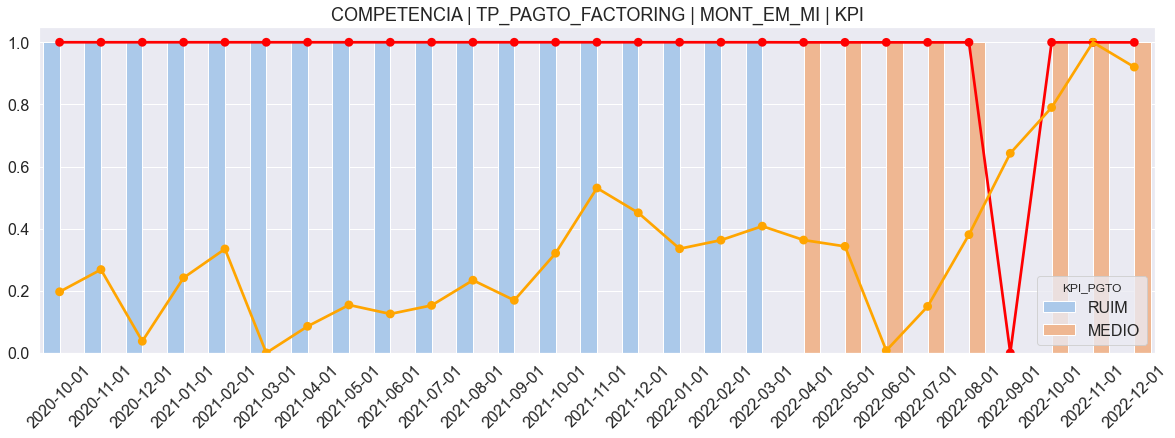

In [237]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x="COMPETENCIA", y="MONT_EM_MI", data=r, ax=ax, hue='KPI_PGTO')
sns.pointplot(data=r, x='COMPETENCIA', y='MONT_EM_MI', color='red')
sns.pointplot(data=r, x='COMPETENCIA', y='TP_PAGTO_FACTORING_MONT_EM_MI', color='orange')

ax.tick_params(axis='x', rotation=45)
plt.title('COMPETENCIA | TP_PAGTO_FACTORING | MONT_EM_MI | KPI')
plt.xlabel(None)
plt.ylabel(None)
plt.show()